In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

from tqdm import tqdm_notebook
import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb
# %matplotlib notebook

%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

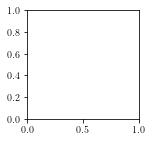

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [3]:
# passive ecoli petsc family method 
importlib.reload(spf_tb)
t0 = time()
# t_theta, t_phi, t_psi = np.pi / 2, np.pi / 2, 0
# t_theta, t_phi, t_psi = 1.366, 6.283, 0
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 3
update_fun='5bs'
rtol=1e-12
atol=1e-15
eval_dt = 0.01
# save_every = np.ceil(1 / eval_dt / 100)
save_every = 1
table_name='ecoC01B05_T0.5'
omega_tail=0

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_ecoli_passive_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, 
                                               rtol=rtol, atol=atol, eval_dt=eval_dt, 
                                               save_every=save_every, table_name=table_name, 
                                               omega_tail=omega_tail)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_passive_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)

# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)


last norm:  1.277854135866298 , 6.273327331677773 , 5.187030096518852
do_calculate_ecoli_passive_Petsc4n: run 3 loops/times using 2.213432s
PETSC RK_5bs rt1e-12, at1e-15, dt1e-02 2.2s


True

In [43]:
0.10000206 - 9.96908399e-02

0.0003112201000000092

/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')



last norm:  1.63330090104367 , 3.1686673849581735 , 4.601479154325094
do_calculate_helix_Petsc4n: run 1000 loops/times using 71.676157s
PETSC RK_5bs rt1e-09, at1e-12, dt1e-02 71.7s


True

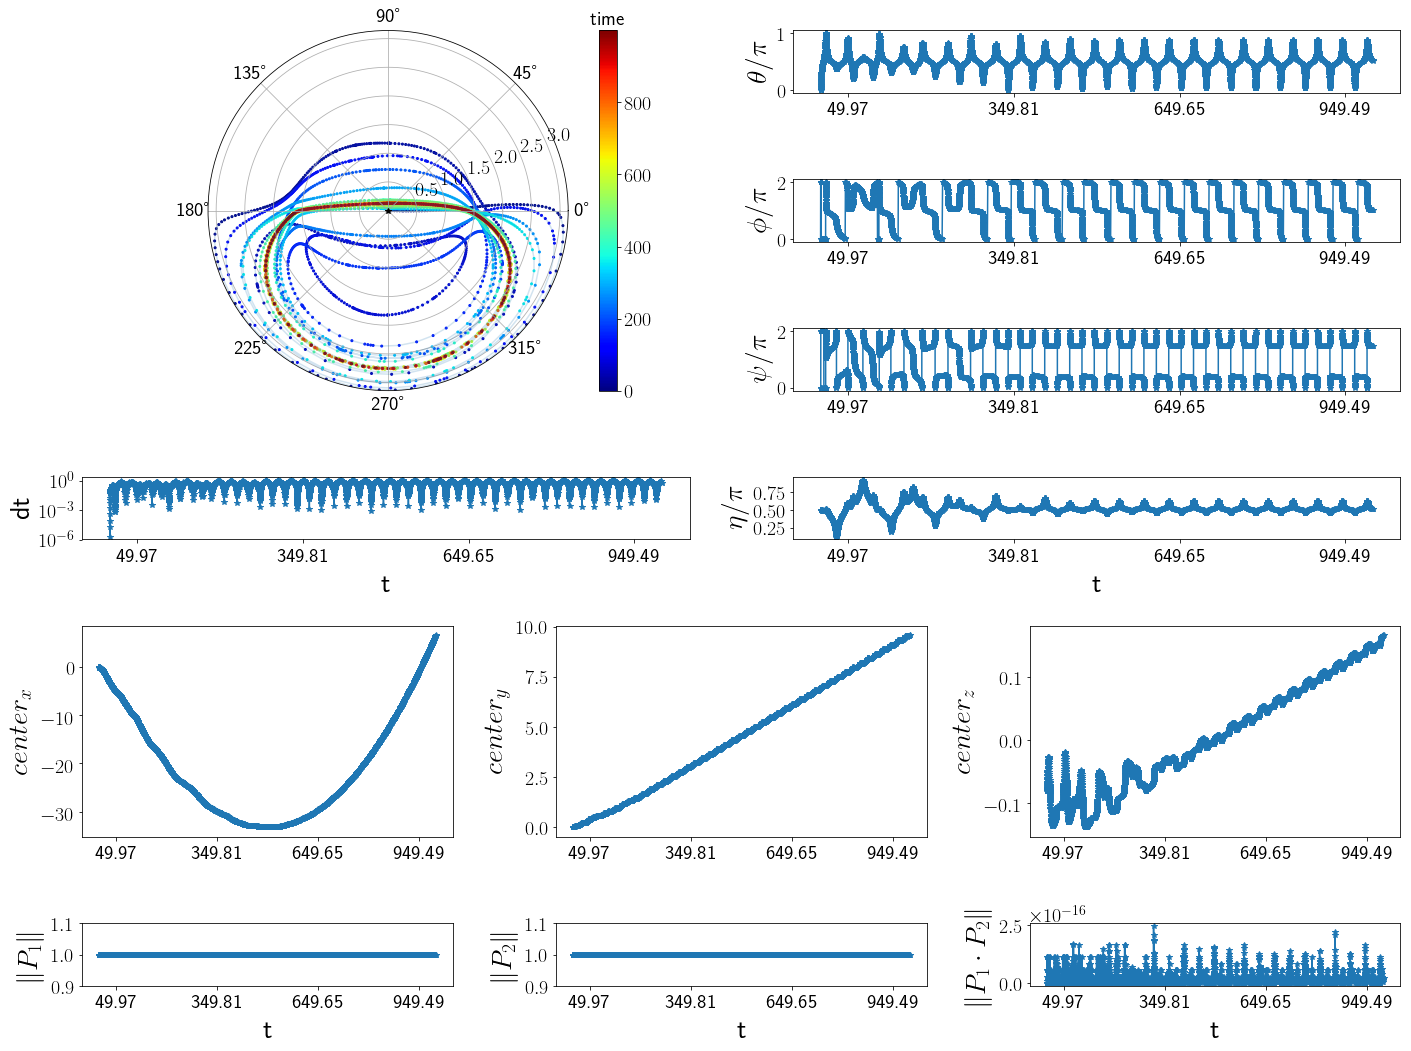

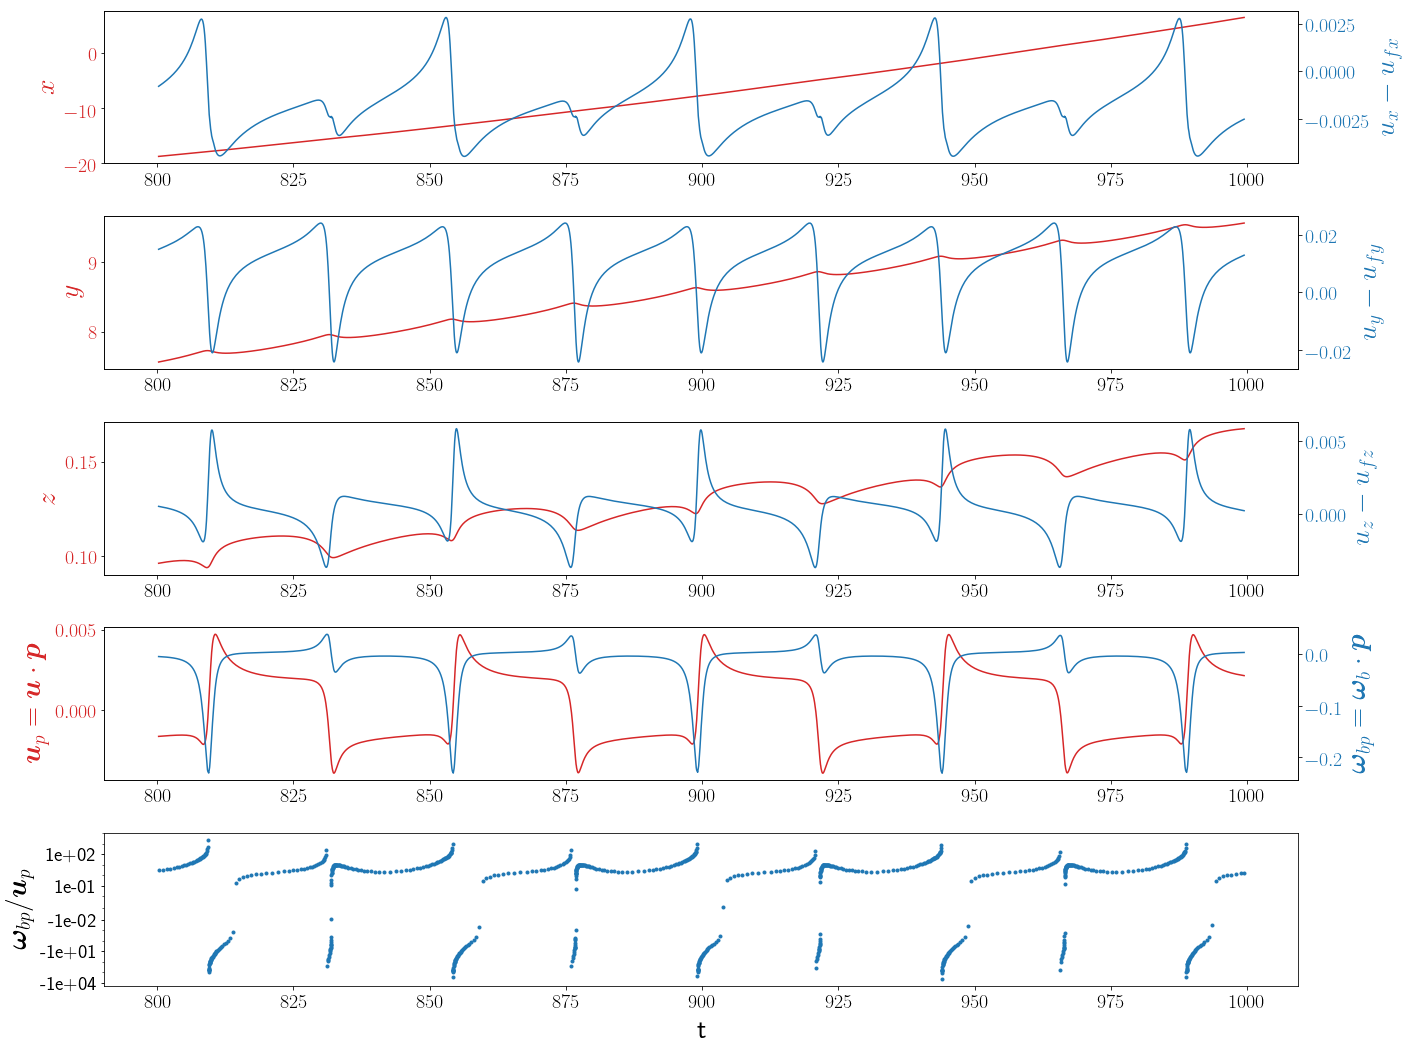

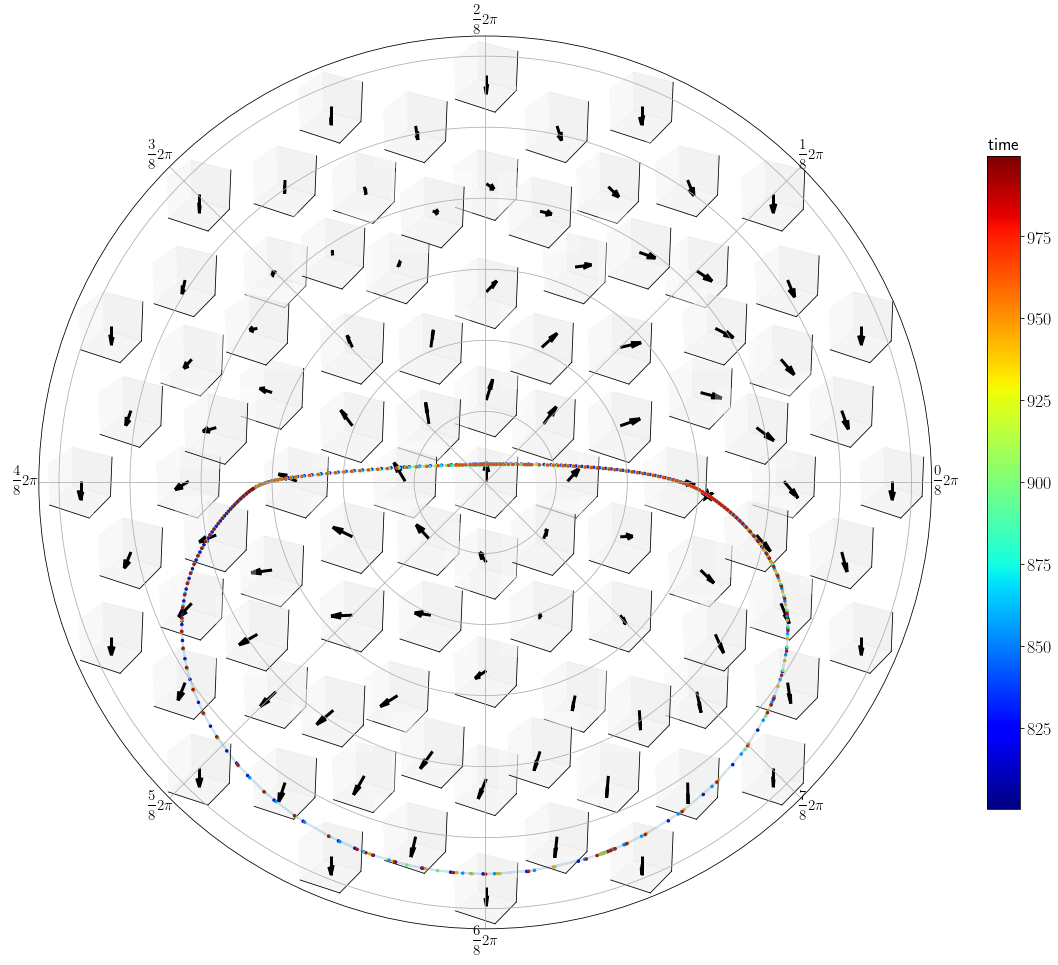

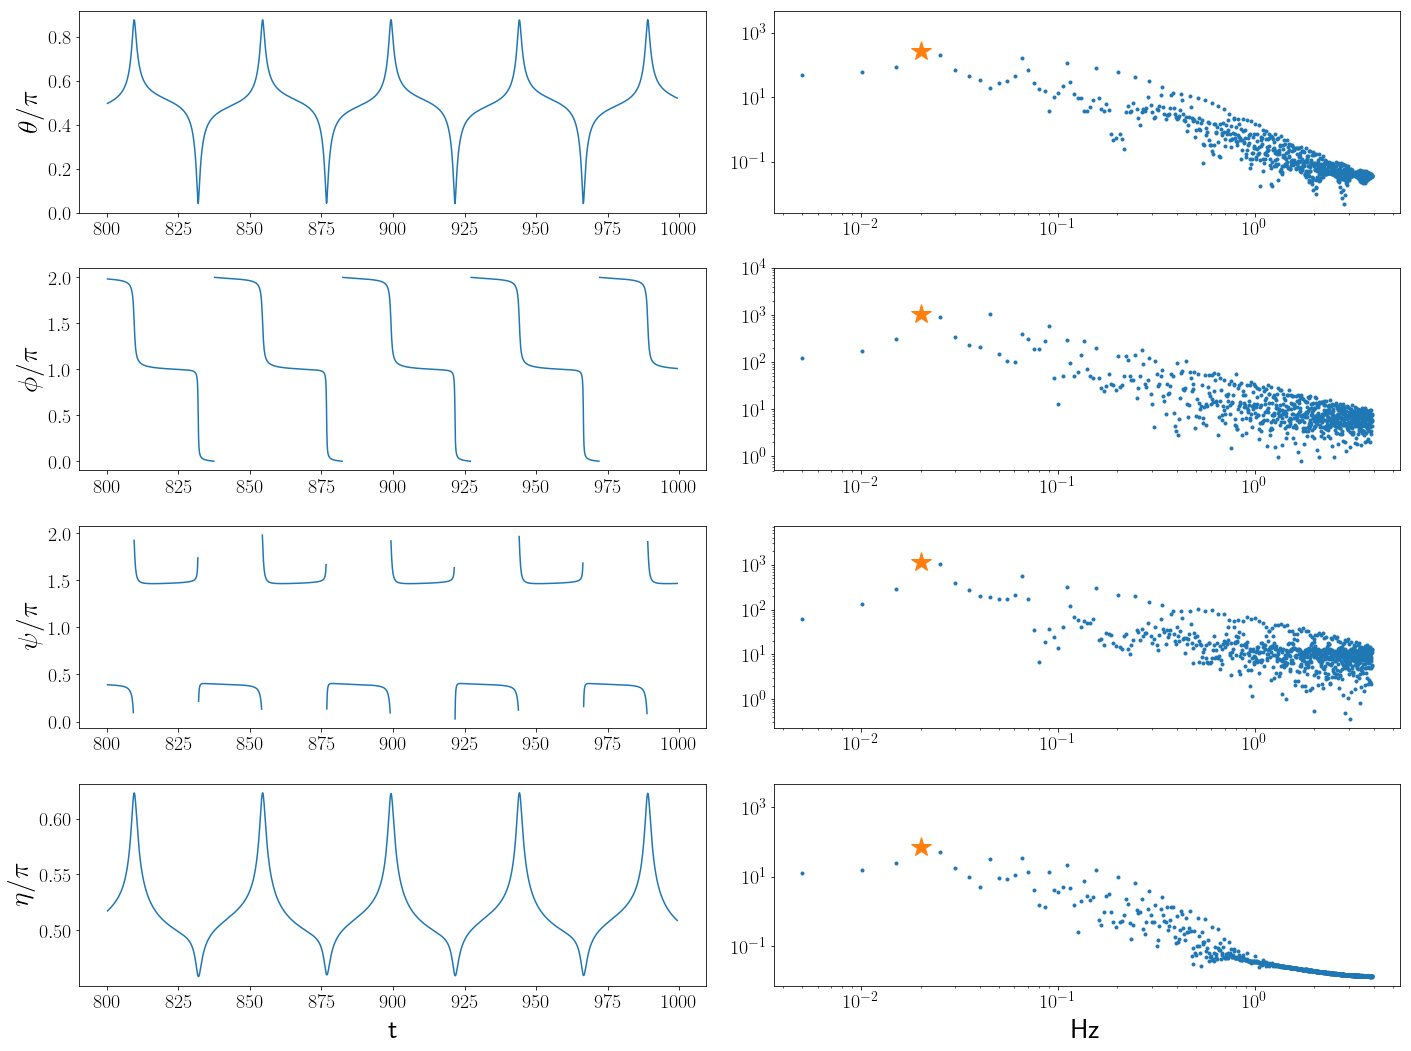

In [31]:
# rotlet helix petsc family quaternion method 
importlib.reload(spf_tb)
t0 = time()
t_theta, t_phi, t_psi = 0, 0, 0
max_t = 1000
update_fun='5bs'
rtol=1e-9
atol=1e-12
eval_dt = 0.01
save_every = 1
table_name='ecoC01B00_T-0.111'
omega_tail=0

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta \
   = spf_tb.do_calculate_helix_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, eval_dt=eval_dt, ini_t=0,
                                       save_every=save_every, table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_helix_Petsc4n', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))

spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)
tidx = Table_t > 800
spf_tb.show_center_X(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                     Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], table_name,
                     move_z=False, planeShearRate=np.array((1, 0, 0)), fig=None, resampling=False, resampling_fct=2)
spf_tb.show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                     Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None,
                      show_back_direction=True)
spf_tb.show_theta_phi_psi_eta(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                              Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx],
                              fig=None, resampling_fct=2, fft_full_mode=False)


/home/zhangji/stokes_flow_master/codeStore/support_fun_table.py:17: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('agg')
/home/zhangji/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


True

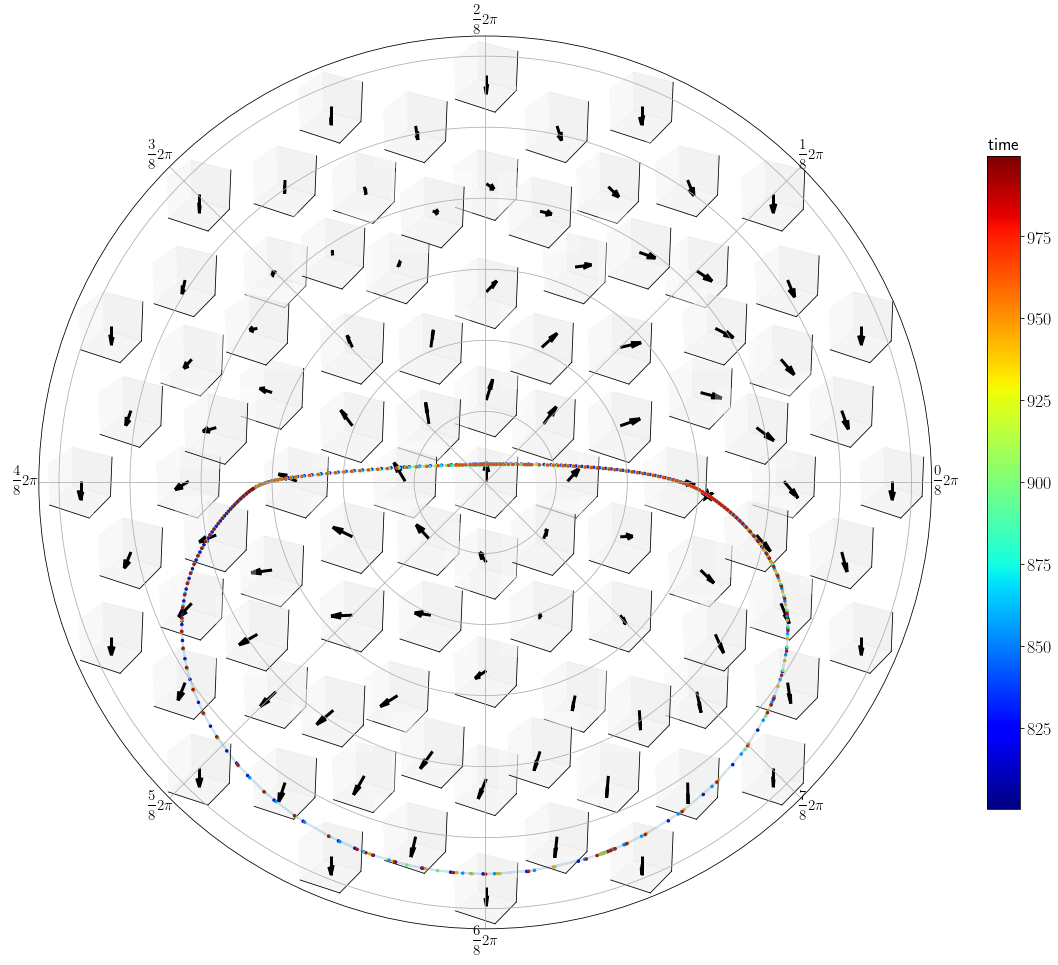

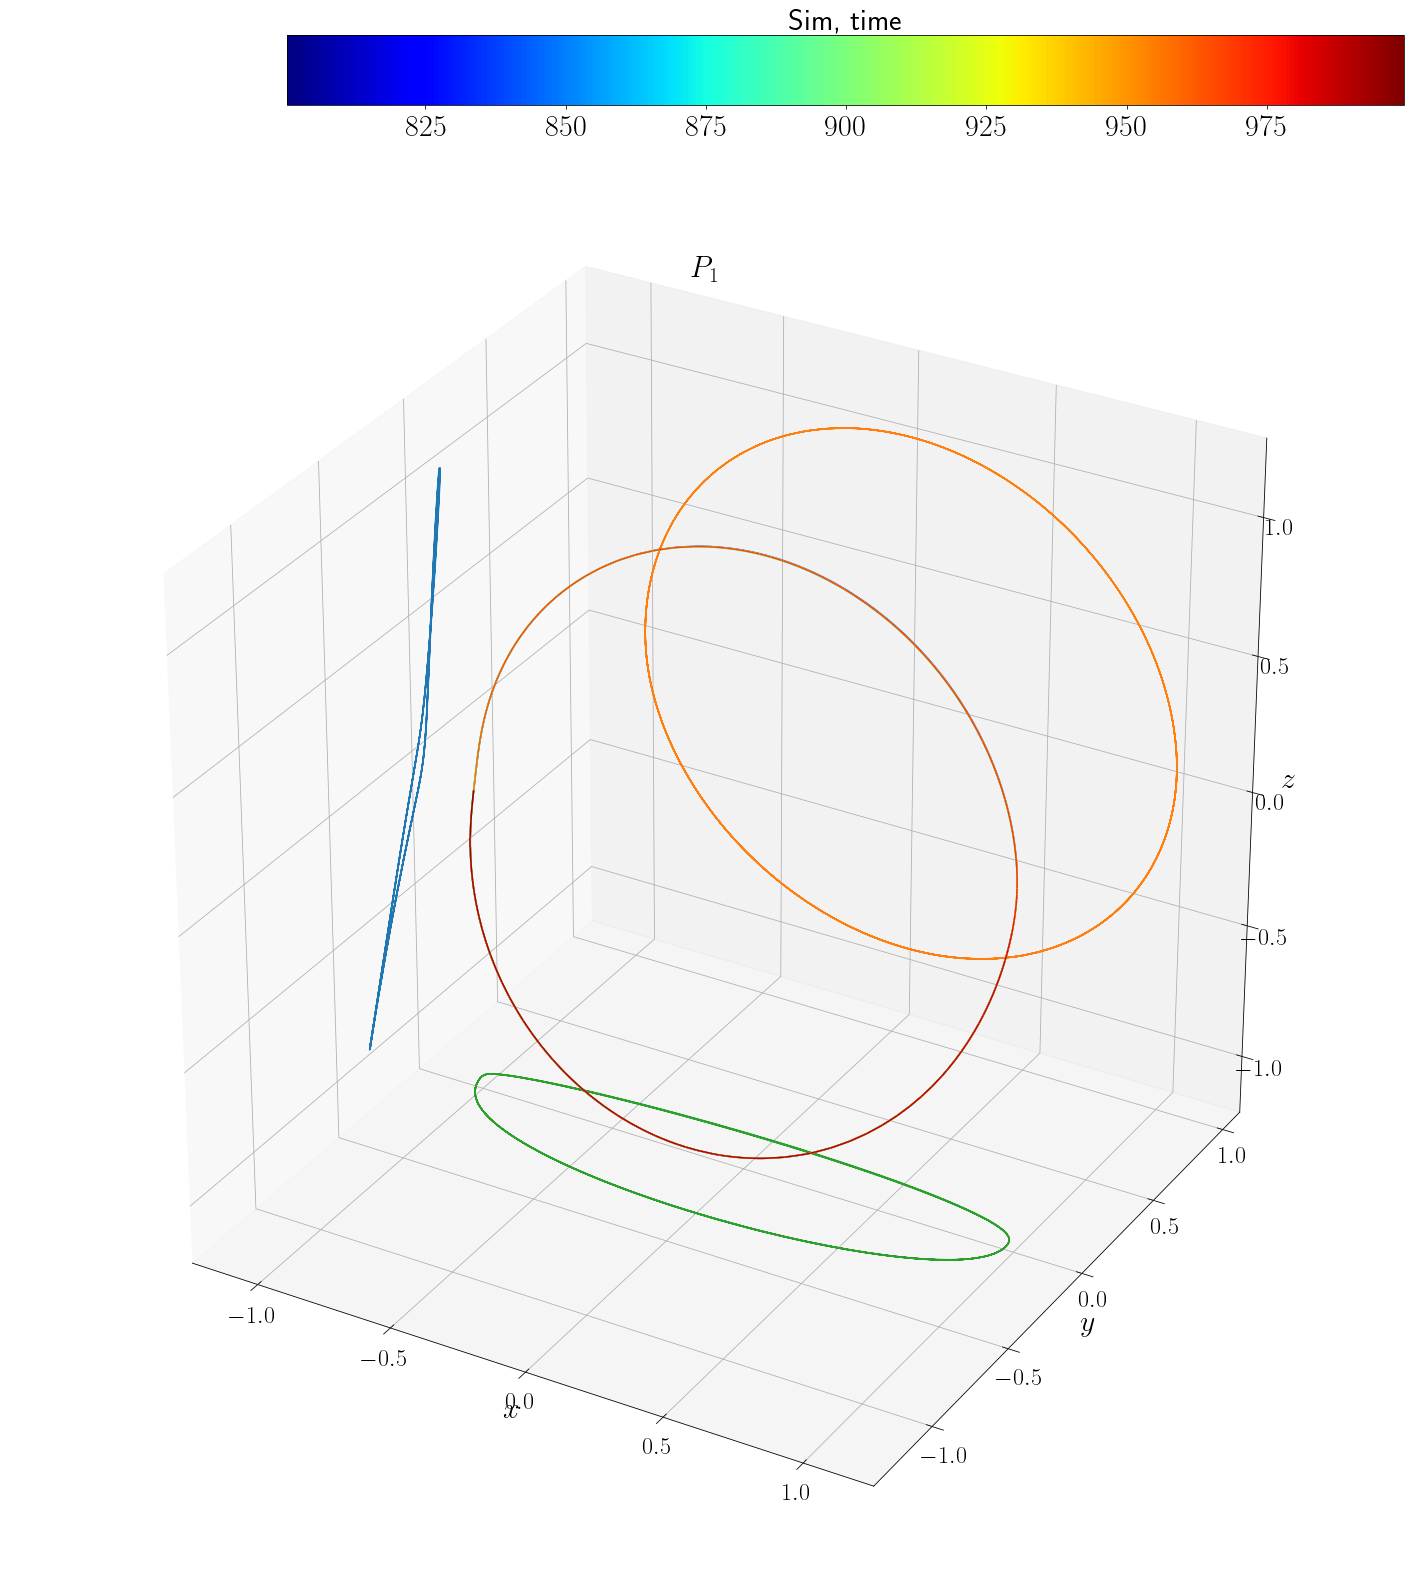

In [42]:
importlib.reload(spf_tb)
tidx = Table_t > 800
spf_tb.show_theta_phi(Table_t[tidx], Table_dt[tidx], Table_X[tidx], Table_P[tidx], Table_P2[tidx], 
                      Table_theta[tidx], Table_phi[tidx], Table_psi[tidx], Table_eta[tidx], fig=None,
                      show_back_direction=True)

In [15]:
t_theta, t_phi, t_psi = 1.562933464730207 , 4.705302456386802 , 1.6120984093995727
np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))

array([-0.00709, -0.99994,  0.00786])


last norm:  1.5072467187465968 , 3.914080489339426 , 1.657522139370816
do_calculate_ecoli_Petsc4nPsi: run 300 loops/times using 18.141328s
PETSC RK_5bs rt1e-06, at1e-09, dt1e-03 18.1s


True

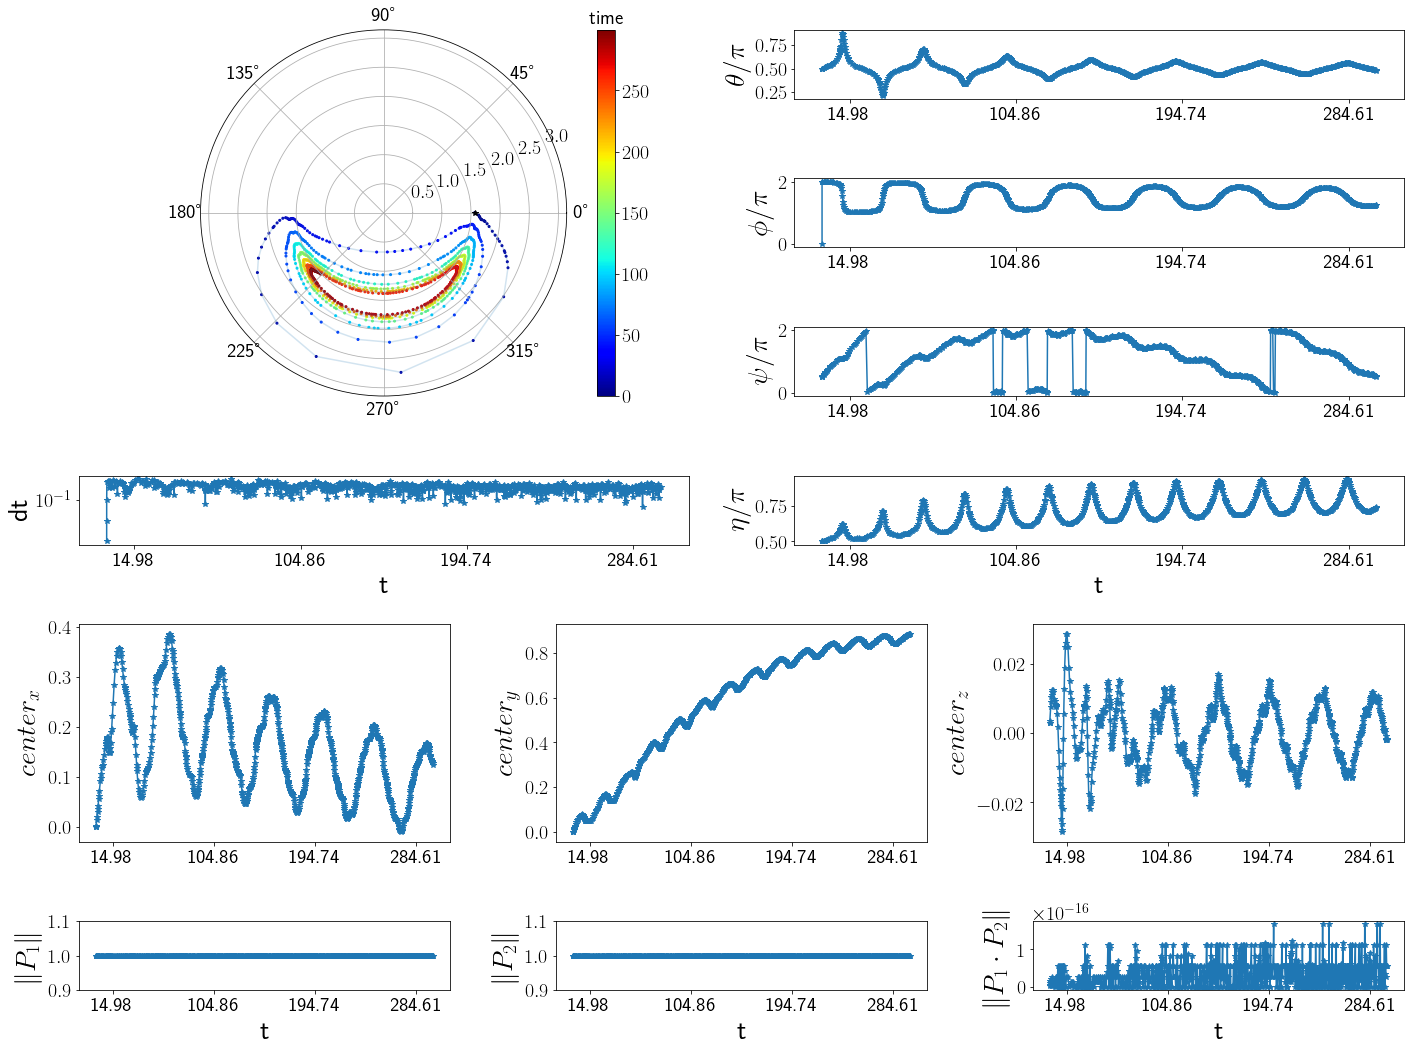

In [9]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
importlib.reload(jm)

t0 = time()
t_theta, t_phi, t_psi = 1.5629334647302116, 0, 1.6120984093974737
max_t = 300
update_fun='5bs'
rtol=1e-6
atol=1e-9
eval_dt = 0.001
save_every = 1
table_name='ecoC01B05_T1'
omega_tail=1

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
t_psi = np.ones(1) * t_psi
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta\
   = spf_tb.do_calculate_ecoli_Petsc4nPsi(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                          eval_dt=eval_dt, save_every=save_every, 
                                          table_name=table_name, omega_tail=omega_tail)
t1 = time()
print('last norm: ', Table_theta[-1], ',', Table_phi[-1], ',', Table_psi[-1])
print('%s: run %d loops/times using %fs' % ('do_calculate_ecoli_Petsc4nPsi', max_t, (t1 - t0)))
print('%s_%s rt%.0e, at%.0e, dt%.0e %.1fs' % ('PETSC RK', update_fun, rtol, atol, eval_dt, (t1 - t0)))
spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# spf_tb.show_theta_phi(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#                          Table_theta, Table_phi, Table_psi, Table_eta, show_back_direction=False)
# t_pick = (t_theta, t_phi, t_psi, max_t, update_fun, rtol, atol, eval_dt, 
#           Table_t, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta, save_every)
# idx = np.load('../motion_ecoliB01_t able/idx.npy')
# t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
# np.save('../motion_ecoliB01_table/idx.npy', (idx + 1))
# with open('../motion_ecoliB01_table/%s' % t_name, 'wb') as handle:    
#     pickle.dump(t_pick, handle, protocol=pickle.HIGHEST_PROTOCOL)
# print('save to %s' % t_name)

In [31]:
tlateral_norm = np.array((np.pi, np.e, np.euler_gamma))
# tlateral_norm = np.random.sample(3)
tlateral_norm = tlateral_norm / np.linalg.norm(tlateral_norm)
tlateral_norm

array([0.74902, 0.6481 , 0.13762])

In [37]:
# active ecoli petsc family method 
importlib.reload(spf_tb)
importlib.reload(jm)

t0 = time()
t_theta, t_phi, t_psi = 1.5629334647302116, 0, 1.6120984093974737
max_t = 500
update_fun='1fe'
rtol=1e-6
atol=1e-9
eval_dt = 100
save_every = 1
table_name='ecoC01B05_tao0_wm1'
omega_tail=1

tnorm = np.array((np.sin(t_theta) * np.cos(t_phi), np.sin(t_theta) * np.sin(t_phi), np.cos(t_theta)))
t_psi = np.ones(1) * t_psi

ta = spf_tb.do_calculate_ecoli_Petsc4n(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                          eval_dt=eval_dt, save_every=save_every, 
                                          table_name=table_name, omega_tail=omega_tail)
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta = ta
# spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#                          Table_theta, Table_phi, Table_psi, Table_eta, save_every)

tb = spf_tb.do_calculate_ecoli_Petsc4nPsi(tnorm, t_psi, max_t, update_fun=update_fun, rtol=rtol, atol=atol, 
                                          eval_dt=eval_dt, save_every=save_every, 
                                          table_name=table_name, omega_tail=omega_tail)
Table_t, Table_dt, Table_X, Table_P, Table_P2, Table_theta, Table_phi, Table_psi, Table_eta = tb
# spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
#                          Table_theta, Table_phi, Table_psi, Table_eta, save_every)

# print(np.max(np.abs((ta[5] - tb[5], ta[6] - tb[6], ta[7] - tb[7]))))
print(ta[5])
print(tb[5])
print(ta[6])
print(tb[6])
print(ta[7])
print(tb[7])
print(ta[3])
print(tb[3])



[1.56293 1.57262 1.5649  1.57044 1.56723]
[1.56293 1.55944 1.56104 1.56169 1.55894]
[6.28319e+00 6.27197e+00 1.43710e-03 6.27088e+00 2.15932e-03]
[6.28319e+00 3.25090e-03 6.28194e+00 3.48116e-03 6.28277e+00]
[1.6121  4.58942 1.28351 4.26084 0.95492]
[1.6121  4.27552 0.65583 3.31923 5.98272]
[[ 9.99969e-01 -2.38178e-17  7.86278e-03]
 [ 9.99935e-01 -1.12160e-02 -1.82423e-03]
 [ 9.99982e-01  1.43708e-03  5.89438e-03]
 [ 9.99924e-01 -1.23090e-02  3.53746e-04]
 [ 9.99991e-01  2.15930e-03  3.56732e-03]]
[[ 9.99969e-01 -2.38178e-17  7.86278e-03]
 [ 9.99930e-01  3.25068e-03  1.13528e-02]
 [ 9.99952e-01 -1.24271e-03  9.75429e-03]
 [ 9.99952e-01  3.48101e-03  9.10841e-03]
 [ 9.99930e-01 -4.18179e-04  1.18552e-02]]


True

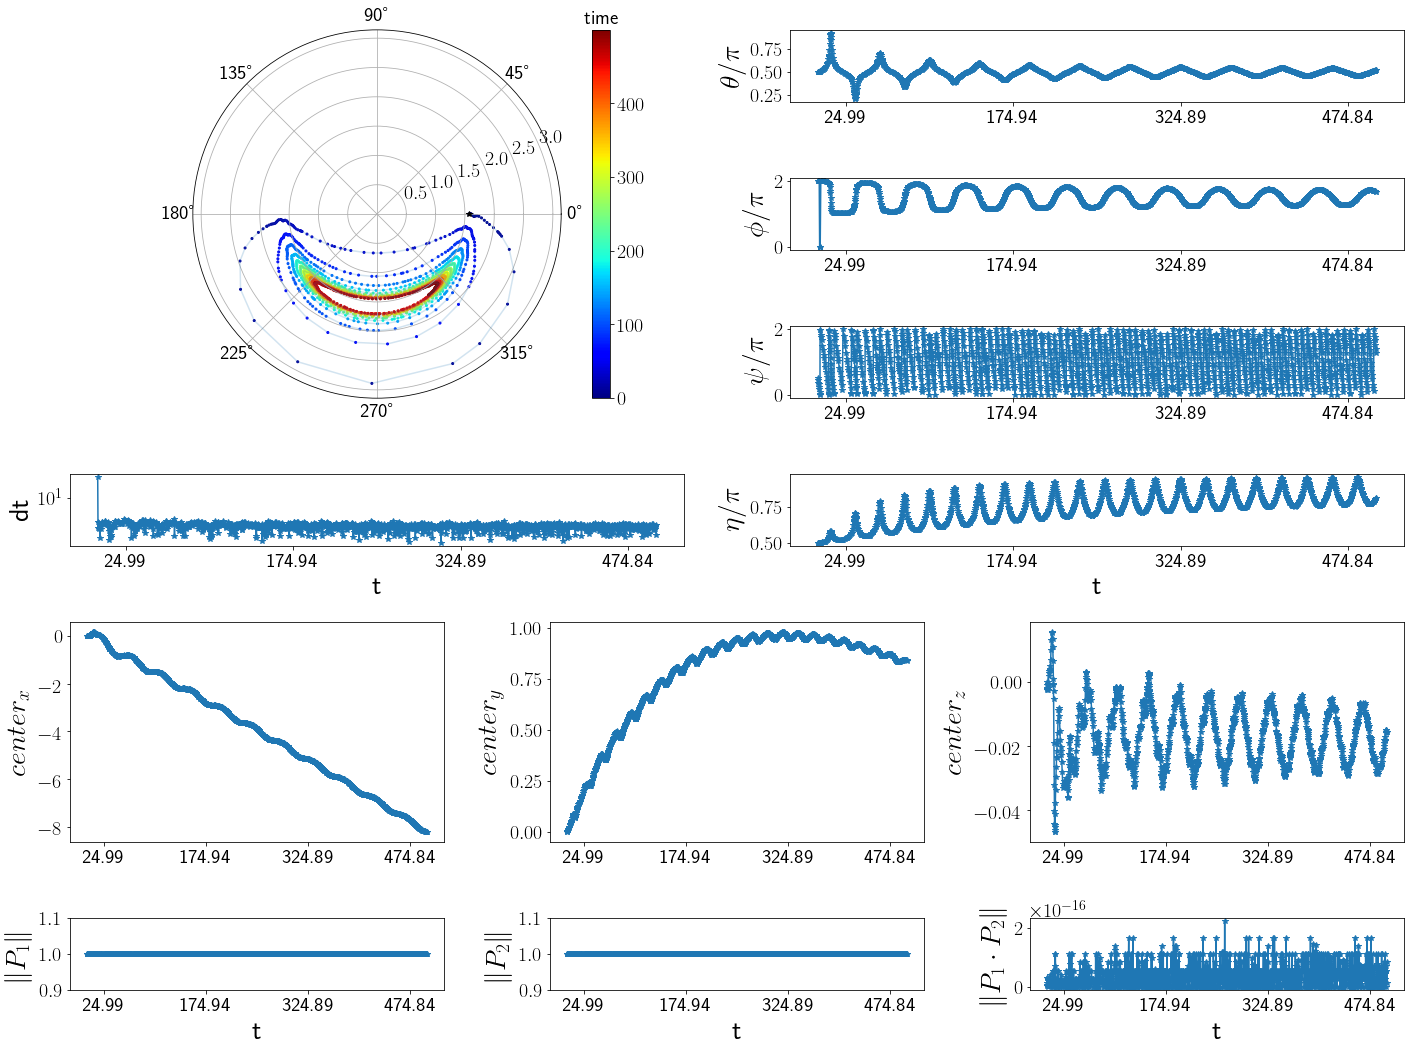

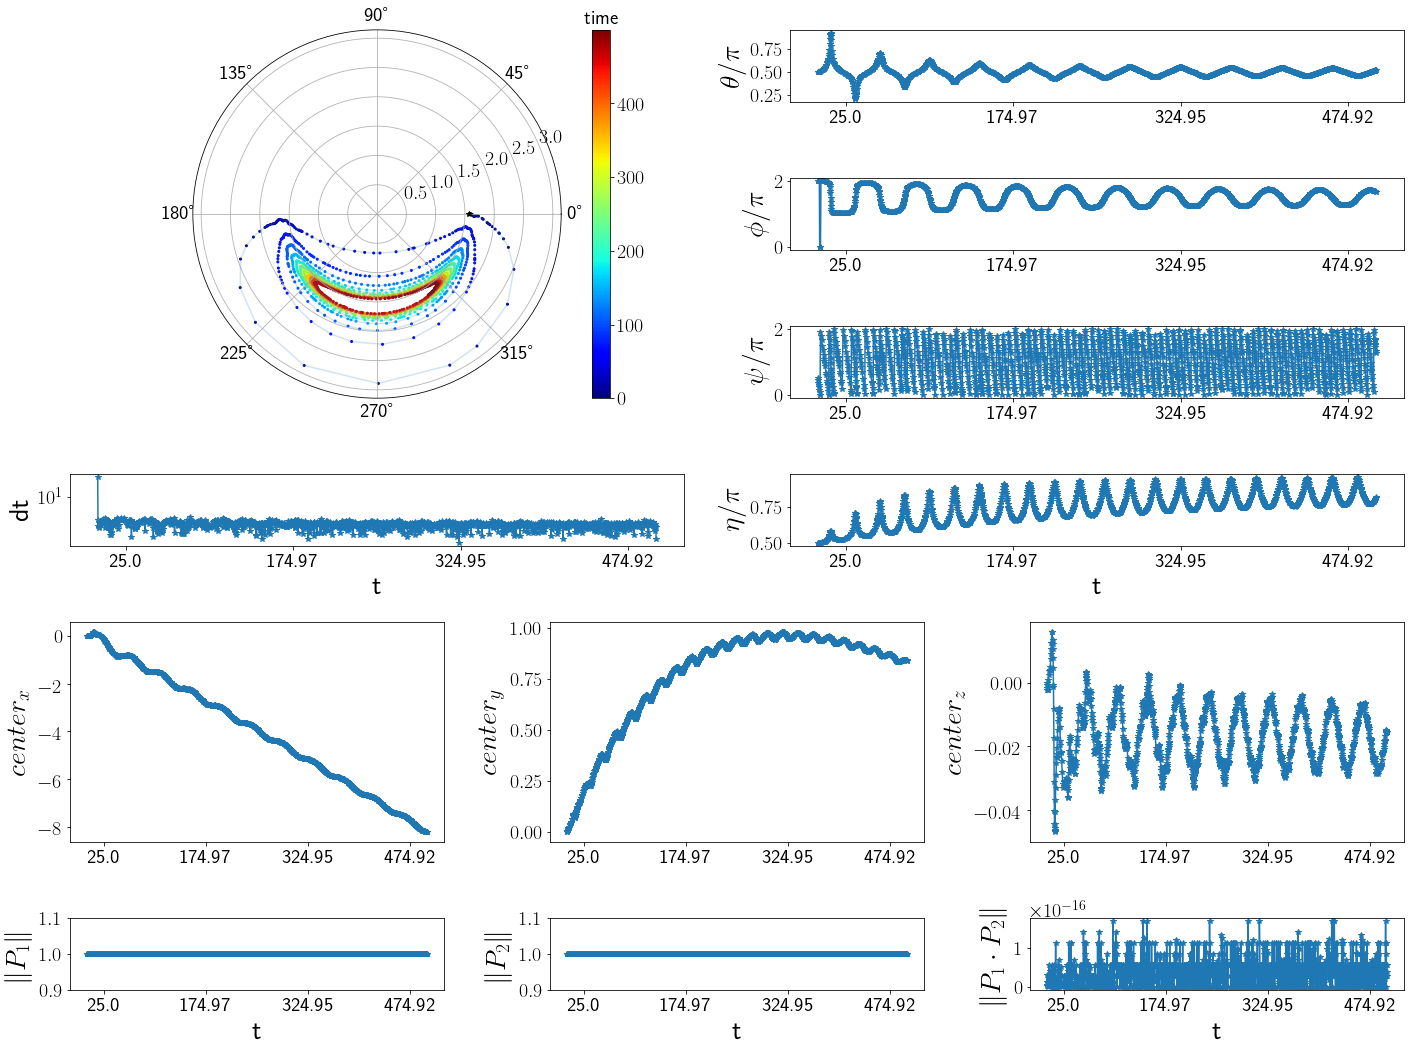

In [35]:
spf_tb.show_table_result(*ta)
spf_tb.show_table_result(*tb)

load table_data from idx034_th0.000_ph0.000_ps0.000.pickle


True

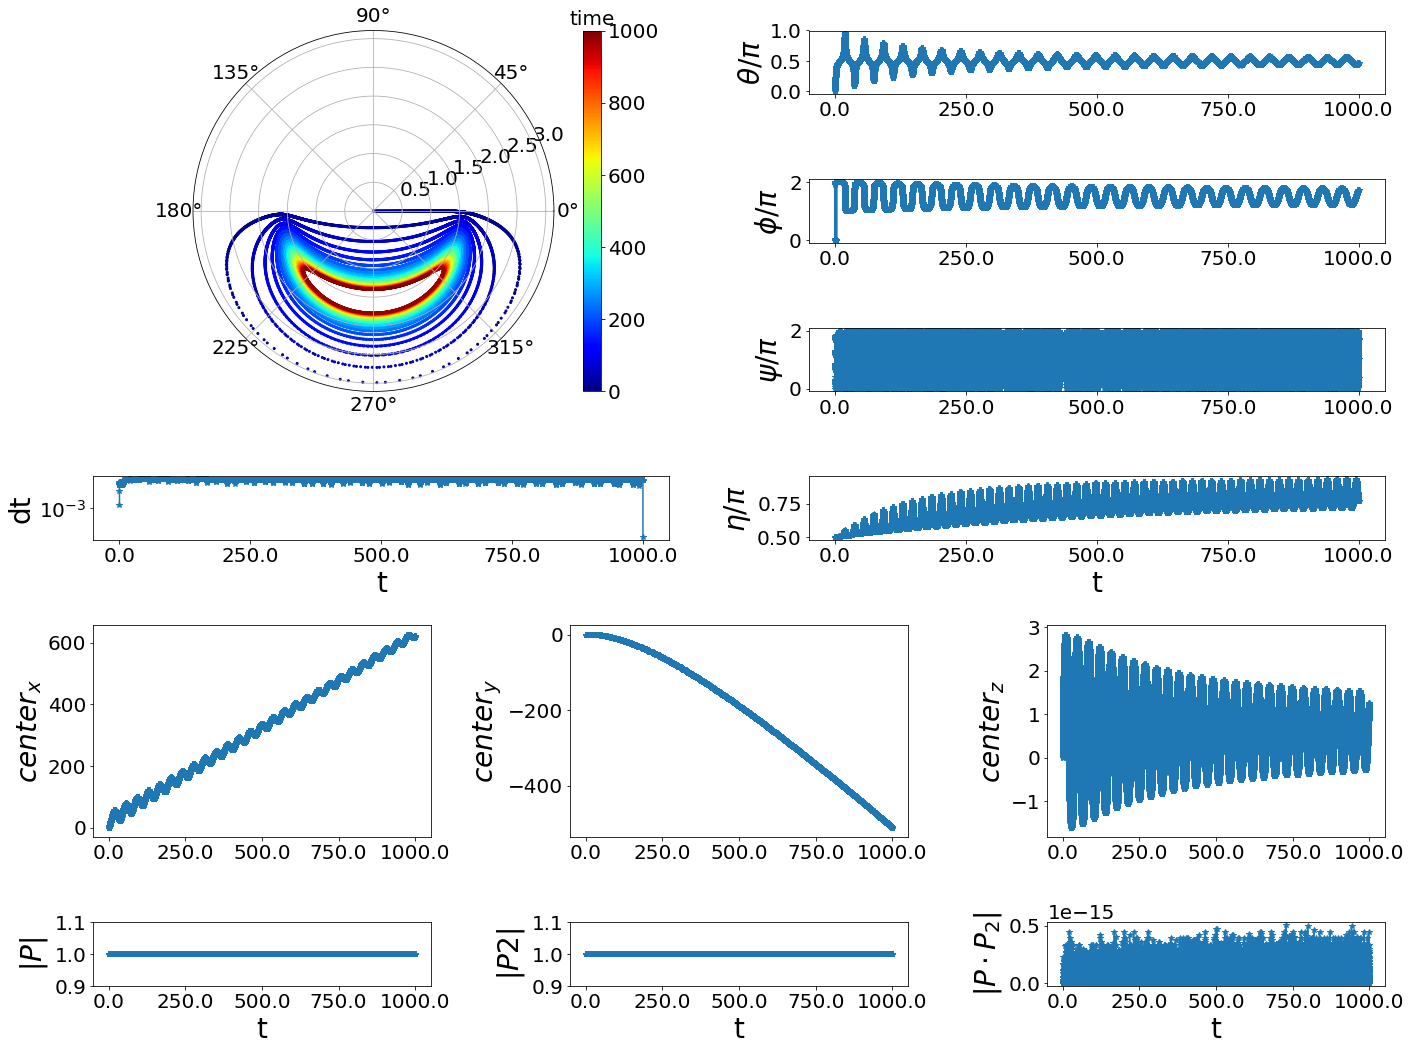

In [3]:
t_theta, t_phi, t_psi = 0, 0, 0
idx = 34
t_name = 'idx%03d_th%5.3f_ph%5.3f_ps%5.3f.pickle' % (idx, t_theta, t_phi, t_psi)
with open('../motion_ecoliB01_table/%s' % t_name, 'rb') as handle:
    tpick = pickle.load(handle)
(t_theta, t_phi, t_psi, 
 max_t, update_fun, rtol, atol, eval_dt, 
 Table_t, Table_X, Table_P, Table_P2, 
 Table_theta, Table_phi, Table_psi, Table_eta, 
 save_every) = tpick
Table_dt = np.hstack((np.diff(Table_t), 0))
print('load table_data from %s' % t_name)

spf_tb.show_table_result(Table_t, Table_dt, Table_X, Table_P, Table_P2, 
                         Table_theta, Table_phi, Table_psi, Table_eta, save_every)